# 4. Praktikum in Data Science - Machine Learning

---

### Aufgabe: Vergleich von ML Algorithmen für die Bildklassifizierung

<img src="digits_output.png" alt="image" width="300" height="auto">

**Ziel**: 

Ziel dieses Praktikums ist es, verschiedene maschinelle Lernmethoden zur Klassifikation von handgeschriebenen Ziffern (0-9) mit dem MNIST-Datensatz zu erkunden und zu vergleichen. Durch diese Aufgabe sollen die Studierenden ein tieferes Verständnis für die Stärken, Schwächen und Anwendungsgebiete verschiedener Algorithmen im maschinellen Lernen erlangen.

**Einführung**:

Der MNIST-Datensatz ist eine Sammlung von handgeschriebenen Ziffern, die häufig zum Einstieg in die Bilderkennung und das maschinelle Lernen genutzt wird. Er besteht aus 70.000 Bildern, wobei jedes Bild eine der Ziffern von 0 bis 9 darstellt. Diese Aufgabe bietet eine praktische Gelegenheit, grundlegende Techniken des maschinellen Lernens anzuwenden und zu vergleichen.

**Aufgabenübersicht**:

1. **Datenvorverarbeitung**:
   - Laden Sie den bereitgestellten MNIST-Datensatz.
   - Teilen Sie den Datensatz in Trainings- und Testsets auf.
   - Führen Sie eine angemessene Vorverarbeitung durch. Für generische ML-Methoden normalisieren Sie die Pixelwerte mit einem geeigneten Skalierer (z.B. StandardScaler oder MinMaxScaler). Für neuronale Netze formatieren Sie die Eingabedaten richtig und skalieren sie auf einen Bereich von 0 bis 1.

2. **Klassifikation mit verschiedenen Algorithmen**:
   - Implementieren und trainieren Sie folgende Algorithmen:
     - Logistische Regression (mit `sklearn`)
     - Decision Tree (mit`sklearn`)
     - Random Forest (mit `sklearn`)
     - Support Vector Machine (SVM) (mit `sklearn`)
     - Dichtes Neuronales Netzwerk (mit `tensorflow.keras` und dem `Sequential`-Package):
       - Verwenden Sie mindestens 2 Hidden Layers (Dense)
       - Nutzen Sie die Loss Function `Crossentropy` (Achtung: Es gibt verschiedene Arten! Informieren Sie sich darüber).
       - Verwenden Sie die Aktivierungsfunktionen `relu` und `softmax` (Achten Sie darauf, welche für welche Layer geeignet sind).
       - Trainieren Sie das Netz für 5 Epochen.
       - nutzen sie die Funktion `summary()`um sich die Netzarchitektur ausgeben zu lassen
   - Achten Sie in jedem Fall auf eine sinnvolle Wahl der Hyperparameter. Informieren Sie sich bei Bedarf auf den jeweiligen Dokumentationsseiten der Bibliotheken.

3. **Bewertung und Vergleich**:
   - Bewerten Sie jedes Modell mit der Metrik `accuracy_score` auf dem Testset.
     - Ziel ist es, eine möglichst hohe Genauigkeit zu erzielen (>90%).
   - Messen Sie die Trainingszeiten für die verschiedenen Algorithmen mit der Funktion `time()`.
   - Vergleichen Sie die Leistung der Modelle in einer Pandas-Tabelle hinsichtlich Genauigkeit und Trainingszeit.
     - Beschreiben Sie die Ergebnisse kurz in etwa 5 Sätzen.

In [17]:
import pandas as pd
# Für die MNIST Daten
from sklearn.datasets import fetch_openml

# Numpy & Pandas
import numpy as np
import pandas as pd

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML Methoden
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Metrik
from sklearn.metrics import accuracy_score

# Tensorflow Neural Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

import seaborn as sns

# Zeitmessung
import time


In [3]:
# Laden des MNIST-Datensatzes
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8) # Konvertierung der Target-Variable in Integer Werte


# Hier könnt ihr jetzt selbst weitermachen. Viel Spaß :D

In [4]:
# In Trainingssets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standartisierung
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistische Regression
start_time = time.time()
log_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print("Logistische Regression - Genauigkeit:", accuracy_log_reg)
time_log_reg = time.time() - start_time
print("Benötigte Zeit:", time.time() - start_time)

Logistische Regression - Genauigkeit: 0.9165
Benötigte Zeit: 111.37032723426819


In [5]:
# Decision Tree
start_time = time.time()
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_scaled, y_train)
y_pred_decision_tree = decision_tree.predict(X_test_scaled)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
print("Decision Tree: Genauigkeit:", accuracy_decision_tree)
time_decision_tree = time.time() - start_time
print("Benötigte Zeit:", time.time() - start_time)

Decision Tree: Genauigkeit: 0.8714285714285714
Benötigte Zeit: 20.64046287536621


In [6]:
# Random Forest
start_time = time.time()
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train_scaled, y_train)
y_pred_random_forest = random_forest.predict(X_test_scaled)
accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
print("Random Forest: Genauigkeit:", accuracy_random_forest)
time_random_forest = time.time() - start_time
print("Benötigte Zeit:", time.time() - start_time)


Random Forest: Genauigkeit: 0.9674285714285714
Benötigte Zeit: 57.11867690086365


In [7]:
# Support Vector Machine (Linear)
start_time = time.time()
linear_svm = LinearSVC(max_iter=1000, random_state=42)
linear_svm.fit(X_train_scaled, y_train)
y_pred_linear_svm = linear_svm.predict(X_test_scaled)
accuracy_linear_svm = accuracy_score(y_test, y_pred_linear_svm)
print("Lineare SVM: Genauigkeit:", accuracy_linear_svm)
time_linear_svm = time.time() - start_time
print("Benötigte Zeit:", time.time() - start_time)

c:\Users\studi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Lineare SVM: Genauigkeit: 0.9074285714285715
Benötigte Zeit: 406.4043970108032


c:\Users\studi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [12]:
# Sequentiielles model
start_time = time.time()
model = Sequential()

model.add(Dense(units=512, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))

# Output Layer
model.add(Dense(units=10, activation='softmax'))

# Model-Kompilierung 'sparse_categorical_crossentropy' als loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


model.summary()

model.fit(X_train_scaled, y_train, epochs=9, validation_split=0.2)
test_loss, accuracy_sm = model.evaluate(X_test_scaled.reshape(-1, X_test_scaled.shape[1]), y_test, verbose=2)

time_sm = time.time() - start_time


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 512)               401920    
                                                                 
 dense_25 (Dense)            (None, 256)               131328    
                                                                 
 dense_26 (Dense)            (None, 128)               32896     
                                                                 
 dense_27 (Dense)            (None, 64)                8256      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 576810 (2.20 MB)
Trainable params: 57681

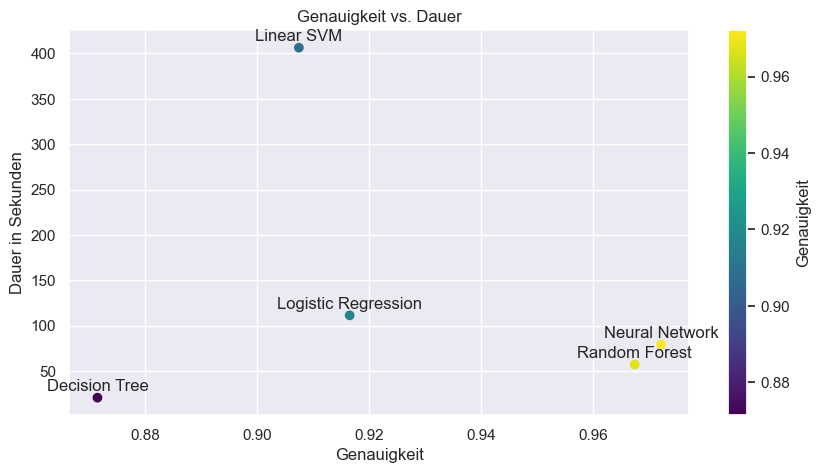

In [20]:
# Modelbenennung, genauigkeit und zeit
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Linear SVM', 'Neural Network']
accuracies = [accuracy_log_reg, accuracy_decision_tree, accuracy_random_forest, accuracy_linear_svm, accuracy_sm]
times = [time_log_reg, time_decision_tree, time_random_forest, time_linear_svm, time_sm]

sns.set(style="darkgrid")

plt.figure(figsize=(10, 5))
scatter = plt.scatter(accuracies, times, c=accuracies, cmap='viridis')

for i, model in enumerate(models):
    plt.annotate(model, (accuracies[i], times[i]), textcoords="offset points", xytext=(0,5), ha='center')

plt.xlabel('Genauigkeit')
plt.ylabel('Dauer in Sekunden')
plt.title('Genauigkeit vs. Dauer')
plt.colorbar(scatter, label='Genauigkeit')
plt.show()
